In [23]:
import os
import random
import numpy as np
import json
from collections import OrderedDict

In [24]:
import torch

## Data Preperation

In [3]:
def seq_format(proteins_dic, output_dir):
    # datasets = ['kiba', 'davis']
    # for dataset in datasets:
    # seq_path = os.path.join('data', dataset, 'seq_original')
    # fpath = os.path.join('data', dataset, 'proteins.txt')
    # proteins = json.load(fpath, object_pairs_hook=OrderedDict)
    for key, value in proteins_dic.items():
        with open(os.path.join(output_dir, key + '.fasta'), 'w') as f:
            f.writelines('>' + key + '\r\n')
            f.writelines(value + '\r\n')

In [4]:
def HHblitsMSA(bin_path, db_path, input_dir, output_dir):
    for fas_file in os.listdir(input_dir):
        process_file = os.path.join(input_dir, fas_file)
        output_file = os.path.join(output_dir, fas_file.split('.fasta')[0] + '.hhr')  # igore
        output_file_a3m = os.path.join(output_dir, fas_file.split('.fasta')[0] + '.a3m')
        if os.path.exists(output_file) and os.path.exists(output_file_a3m):
            # print(output_file, output_file_a3m, 'exist.')
            # count += 1
            continue
        # print(process_file)
        process_file = process_file.replace('(', '\(').replace(')', '\)')
        output_file = output_file.replace('(', '\(').replace(')', '\)')
        output_file_a3m = output_file_a3m.replace('(', '\(').replace(')', '\)')
        cmd = bin_path + ' -maxfilt 100000 -realign_max 100000 -d ' + db_path + ' -all -B 100000 -Z 100000 -n 3 -e 0.001 -i ' + process_file + ' -o ' + output_file + ' -oa3m ' + output_file_a3m + ' -cpu 8'
        print(cmd)
        os.system(cmd)
        # print(cmd)
        # print(count)

In [5]:
def HHfilter(bin_path, input_dir, output_dir):
    file_prefix = []
    # print(input_dir)
    for file in os.listdir(input_dir):
        if 'a3m' not in file:
            continue
        temp_prefix = file.split('.a3m')[0]
        if temp_prefix not in file_prefix:
            file_prefix.append(temp_prefix)
    # random.shuffle(file_prefix)
    # print(len(file_prefix))
    # print(file_prefix)
    for msa_file_prefix in file_prefix:
        file_name = msa_file_prefix + '.a3m'
        process_file = os.path.join(input_dir, file_name)
        output_file = os.path.join(output_dir, file_name)
        if os.path.exists(output_file):
            continue
        process_file = process_file.replace('(', '\(').replace(')', '\)')
        output_file = output_file.replace('(', '\(').replace(')', '\)')
        cmd = bin_path + ' -id 90 -i ' + process_file + ' -o ' + output_file
        print(cmd)
        os.system(cmd)

In [6]:
def reformat(bin_path, input_dir, output_dir):
    # print('reformat')
    for a3m_file in os.listdir(input_dir):
        process_file = os.path.join(input_dir, a3m_file)
        output_file = os.path.join(output_dir, a3m_file.split('.a3m')[0] + '.fas')
        if os.path.exists(output_file):
            continue
        process_file = process_file.replace('(', '\(').replace(')', '\)')
        output_file = output_file.replace('(', '\(').replace(')', '\)')
        cmd = bin_path + ' ' + process_file + ' ' + output_file + ' -r'
        print(cmd)
        os.system(cmd)

In [7]:
def convertAlignment(bin_path, input_dir, output_dir):
    # print('convertAlignment')
    for fas_file in os.listdir(input_dir):
        process_file = input_dir + '/' + fas_file
        output_file = output_dir + '/' + fas_file.split('.fas')[0] + '.aln'
        if os.path.exists(output_file):
            continue
        process_file = process_file.replace('(', '\(').replace(')', '\)')
        output_file = output_file.replace('(', '\(').replace(')', '\)')
        cmd = 'python ' + bin_path + ' ' + process_file + ' fasta ' + output_file
        print(cmd)
        os.system(cmd)

In [ ]:
def alnFilePrepare():
    import json
    from collections import OrderedDict
    print('aln file prepare ...')
    datasets = ['davis', 'kiba']
    # datasets = ['davis']
    for dataset in datasets:
        seq_dir = os.path.join('data', dataset, 'seq')
        msa_dir = os.path.join('data', dataset, 'msa')
        filter_dir = os.path.join('data', dataset, 'hhfilter')
        reformat_dir = os.path.join('data', dataset, 'reformat')
        aln_dir = os.path.join('data', dataset, 'aln')
        # pconsc4_dir = os.path.join('data', dataset, 'pconsc4')
        protein_path = os.path.join('data', dataset)
        proteins = json.load(open(os.path.join(protein_path, 'proteins.txt')), object_pairs_hook=OrderedDict)

        if not os.path.exists(seq_dir):
            os.makedirs(seq_dir)
        if not os.path.exists(msa_dir):
            os.makedirs(msa_dir)
        if not os.path.exists(filter_dir):
            os.makedirs(filter_dir)
        if not os.path.exists(reformat_dir):
            os.makedirs(reformat_dir)
        if not os.path.exists(aln_dir):
            os.makedirs(aln_dir)

        HHblits_bin_path = '..../tool/hhsuite/bin/hhblits'  # HHblits bin path
        HHblits_db_path = '..../dataset/uniclust/uniclust30_2018_08/uniclust30_2018_08'  # hhblits dataset for msa
        HHfilter_bin_path = '..../tool/hhsuite/bin/hhfilter'  # HHfilter bin path
        reformat_bin_path = '..../tool/hhsuite/scripts/reformat.pl'  # reformat bin path
        convertAlignment_bin_path = '..../tool/CCMpred/scripts/convert_alignment.py'  # ccmpred convertAlignment bin path

        # check the programs used for the script
        if not os.path.exists(HHblits_bin_path):
            raise Exception('Program HHblits was not found. Please specify the run path.')

        if not os.path.exists(HHfilter_bin_path):
            raise Exception('Program HHfilter was not found. Please specify the run path.')

        if not os.path.exists(reformat_bin_path):
            raise Exception('Program reformat was not found. Please specify the run path.')

        if not os.path.exists(convertAlignment_bin_path):
            raise Exception('Program convertAlignment was not found. Please specify the run path.')

        seq_format(proteins, seq_dir)
        HHblitsMSA(HHblits_bin_path, HHblits_db_path, seq_dir, msa_dir)
        HHfilter(HHfilter_bin_path, msa_dir, filter_dir)
        reformat(reformat_bin_path, filter_dir, reformat_dir)
        convertAlignment(convertAlignment_bin_path, reformat_dir, aln_dir)

        print('aln file prepare over.')


In [ ]:
os.path.exists('..../tool/hhsuite/bin/hhblits')

In [63]:
!pip3 install pythran==0.9.0

In [62]:
!pip3 install gast==0.4.0

In [61]:
!pip3 install beniget==0.3.0

  Attempting uninstall: beniget
    Found existing installation: beniget 0.4.1
    Uninstalling beniget-0.4.1:
      Successfully uninstalled beniget-0.4.1


In [48]:
!pip3 install Cython pythran

     |████████████████████████████████| 1.9 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 95.9 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 2.7 MB/s s eta 0:00:01
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires gast==0.4.0, but you have gast 0.5.2 which is incompatible.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.20.3 which is incompatible.
tensorflow-gpu 2.6.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.


In [66]:
!pip3 install pconsc4==0.4

  Using cached pconsc4-0.4-cp38-cp38-linux_x86_64.whl
  Using cached pyGaussDCA-1.0.tar.gz (3.8 MB)
    ERROR: Command errored out with exit status 1:
     command: /disk/scratch/miniconda3/envs/mldd1/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-potusst4/pygaussdca_80ea7af5a433478c9d375763958d3d4a/setup.py'"'"'; __file__='"'"'/tmp/pip-install-potusst4/pygaussdca_80ea7af5a433478c9d375763958d3d4a/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-ng12qbw8
         cwd: /tmp/pip-install-potusst4/pygaussdca_80ea7af5a433478c9d375763958d3d4a/
    Complete output (25 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-po

    ERROR: Command errored out with exit status 1:
     command: /disk/scratch/miniconda3/envs/mldd1/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-potusst4/pygaussdca_5a2fc33d29b1457b833dd87e48cd2df3/setup.py'"'"'; __file__='"'"'/tmp/pip-install-potusst4/pygaussdca_5a2fc33d29b1457b833dd87e48cd2df3/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-qn6f303m
         cwd: /tmp/pip-install-potusst4/pygaussdca_5a2fc33d29b1457b833dd87e48cd2df3/
    Complete output (25 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-potusst4/pygaussdca_5a2fc33d29b1457b833dd87e48cd2df3/setup.py", line 10, in <module>
        from pyth

In [72]:
!conda install -c conda-forge pyGaussDCA

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - pygaussdca

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [ ]:
def pconsc4Prediction():
    import pconsc4
    import keras.backend.tensorflow_backend as KTF
    import tensorflow as tf
    # config = tf.ConfigProto()
    # config.gpu_options.allow_growth = True
    # session = tf.Session(config=config)
    # KTF.set_session(session)
    datasets = ['davis', 'kiba']
    model = pconsc4.get_pconsc4()
    for dataset in datasets:
        aln_dir = os.path.join('data', dataset, 'hhfilter')
        output_dir = os.path.join('data', dataset, 'pconsc4')
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        file_list = os.listdir(aln_dir)
        random.shuffle(file_list)
        inputs = []
        outputs = []
        for file in file_list:
            input_file = os.path.join(aln_dir, file)
            output_file = os.path.join(output_dir, file.split('.a3m')[0] + '.npy')
            if os.path.exists(output_file):
                # print(output_file, 'exist.')
                continue
            inputs.append(input_file)
            outputs.append(output_file)
            try:
                print('process', input_file)
                pred = pconsc4.predict(model, input_file)
                np.save(output_file, pred['cmap'])
                print(output_file, 'over.')
            except:
                print(output_file, 'error.')

In [ ]:
alnFilePrepare()
    

In [ ]:
pconsc4Prediction()

In [ ]:
os.path.join('data','davis', 'hhfilter')

### Training

In [25]:
import sys, os
import torch
import torch.nn as nn

In [26]:
from gnn import GNNNet
from utils import *
from emetrics import *
from data_process import create_dataset_for_5folds

In [27]:
from torch_geometric.data import DataLoader

In [28]:
!conda list 

# packages in environment at /disk/scratch/miniconda3/envs/mldd1:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             4.5                       1_gnu  
absl-py                   0.15.0                   pypi_0    pypi
anyio                     2.2.0            py38h06a4308_1  
argon2-cffi               20.1.0           py38h27cfd23_1  
astunparse                1.6.3                    pypi_0    pypi
async_generator           1.10               pyhd3eb1b0_0  
attrs                     21.2.0             pyhd3eb1b0_0  
babel                     2.9.1              pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beniget                   0.3.0                    pypi_0    pypi
biopython                 1.79                     pypi_0    pypi
bleach                    4.0.0              pyhd3eb1b0_0  
boost                     1.74.0           py38hc10631b_3    

In [29]:
import torch
from torch_sparse import transpose

In [30]:
from torch_sparse import SparseTensor

In [31]:
import deepchem

In [32]:
import tensorflow as tf

In [33]:
import rdkit as rd

In [34]:
import pandas as pd

In [35]:
import sys, os
import torch
import torch.nn as nn
from torch_geometric.data import DataLoader

from gnn import GNNNet
from utils import *
from emetrics import *
from data_process import create_dataset_for_5folds

In [36]:
datasets = [['davis', 'kiba'][0]]

In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cuda')

In [38]:
torch.device('cuda:0')

device(type='cuda', index=0)

In [39]:
cuda_name = ['cuda:0', 'cuda:1', 'cuda:2', 'cuda:3'][0]
print('cuda_name:', cuda_name)

cuda_name: cuda:0


In [40]:
fold = [0, 1, 2, 3, 4][0]
cross_validation_flag = True
# print(int(sys.argv[3]))

TRAIN_BATCH_SIZE = 128
TEST_BATCH_SIZE = 128
LR = 0.001
NUM_EPOCHS = 10

print('Learning rate: ', LR)
print('Epochs: ', NUM_EPOCHS)

Learning rate:  0.001
Epochs:  10


In [41]:
models_dir = 'models_sample'
results_dir = 'results'

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Main program: iterate over different datasets
result_str = ''
USE_CUDA = torch.cuda.is_available()
device = torch.device(cuda_name)
model = GNNNet()
model.to(device)
model_st = GNNNet.__name__
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)


GNNNet Loaded


In [43]:
for dataset in datasets:
    train_data, valid_data = create_dataset_for_5folds(dataset, fold)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=TRAIN_BATCH_SIZE, shuffle=True,
                                               collate_fn=collate)
    valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=TEST_BATCH_SIZE, shuffle=False,
                                               collate_fn=collate)

    best_mse = 1000
    best_test_mse = 1000
    best_epoch = -1
    model_file_name = 'models_sample/model1111_' + model_st + '_' + dataset + '_' + str(fold) + '.model'

    for epoch in range(NUM_EPOCHS):
        train(model, device, train_loader, optimizer, epoch + 1)
        print('predicting for valid data')
        G, P = predicting(model, device, valid_loader)
        val = get_mse(G, P)
        print('valid result:', val, best_mse)
        if val < best_mse:
            best_mse = val
            best_epoch = epoch + 1
            torch.save(model.state_dict(), model_file_name)
            print('rmse improved at epoch ', best_epoch, '; best_test_mse', best_mse, model_st, dataset, fold)
        else:
            print('No improvement since epoch ', best_epoch, '; best_test_mse', best_mse, model_st, dataset, fold)


dataset: davis
fold: 0
train entries: 20036 effective train entries 20036
valid entries: 5010 effective valid entries 5010
effective drugs,effective prot: 68 442
Training on 20036 samples...
Train epoch: 1 [0/20036 (0%)]	Loss: 0.965666
Train epoch: 1 [5120/20036 (6%)]	Loss: 0.765495
Train epoch: 1 [10240/20036 (13%)]	Loss: 0.886228
Train epoch: 1 [15360/20036 (19%)]	Loss: 0.788348
Train epoch: 1 [20480/20036 (25%)]	Loss: 1.217539
Train epoch: 1 [25600/20036 (32%)]	Loss: 0.984902
Train epoch: 1 [30720/20036 (38%)]	Loss: 0.813761
Train epoch: 1 [35840/20036 (45%)]	Loss: 1.104802
Train epoch: 1 [40960/20036 (51%)]	Loss: 1.160612
Train epoch: 1 [46080/20036 (57%)]	Loss: 0.957592
Train epoch: 1 [51200/20036 (64%)]	Loss: 0.803269
Train epoch: 1 [56320/20036 (70%)]	Loss: 0.584575
Train epoch: 1 [61440/20036 (76%)]	Loss: 0.812163
Train epoch: 1 [66560/20036 (83%)]	Loss: 0.618415
Train epoch: 1 [71680/20036 (89%)]	Loss: 0.774448
Train epoch: 1 [76800/20036 (96%)]	Loss: 0.842715
predicting for v

Train epoch: 9 [15360/20036 (19%)]	Loss: 0.852124
Train epoch: 9 [20480/20036 (25%)]	Loss: 0.768753
Train epoch: 9 [25600/20036 (32%)]	Loss: 0.521024
Train epoch: 9 [30720/20036 (38%)]	Loss: 0.966145
Train epoch: 9 [35840/20036 (45%)]	Loss: 0.884914
Train epoch: 9 [40960/20036 (51%)]	Loss: 0.870694
Train epoch: 9 [46080/20036 (57%)]	Loss: 0.579801
Train epoch: 9 [51200/20036 (64%)]	Loss: 1.030490
Train epoch: 9 [56320/20036 (70%)]	Loss: 0.792312
Train epoch: 9 [61440/20036 (76%)]	Loss: 0.738283
Train epoch: 9 [66560/20036 (83%)]	Loss: 0.399045
Train epoch: 9 [71680/20036 (89%)]	Loss: 0.755351
Train epoch: 9 [76800/20036 (96%)]	Loss: 0.424184
predicting for valid data
Make prediction for 5010 samples...
valid result: 0.57598835 0.5954082
rmse improved at epoch  9 ; best_test_mse 0.57598835 GNNNet davis 0
Training on 20036 samples...
Train epoch: 10 [0/20036 (0%)]	Loss: 0.577854
Train epoch: 10 [5120/20036 (6%)]	Loss: 0.777913
Train epoch: 10 [10240/20036 (13%)]	Loss: 0.614771
Train epoc

In [44]:
print(model)

GNNNet(
  (mol_conv1): GCNConv(78, 78)
  (mol_conv2): GCNConv(78, 156)
  (mol_conv3): GCNConv(156, 312)
  (mol_fc_g1): Linear(in_features=312, out_features=1024, bias=True)
  (mol_fc_g2): Linear(in_features=1024, out_features=128, bias=True)
  (pro_conv1): GCNConv(54, 54)
  (pro_conv2): GCNConv(54, 108)
  (pro_conv3): GCNConv(108, 216)
  (pro_fc_g1): Linear(in_features=216, out_features=1024, bias=True)
  (pro_fc_g2): Linear(in_features=1024, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=256, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=1, bias=True)
)


In [45]:
import os
import sys
import torch
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
from torch_geometric.data import Batch

from emetrics import get_aupr, get_cindex, get_rm2, get_ci, get_mse, get_rmse, get_pearson, get_spearman
from utils import *
from scipy import stats
from gnn import GNNNet
from data_process import create_dataset_for_test


def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data_mol = data[0].to(device)
            data_pro = data[1].to(device)
            # data = data.to(device)
            output = model(data_mol, data_pro)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data_mol.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(), total_preds.numpy().flatten()


def load_model(model_path):
    model = torch.load(model_path)
    return model


def calculate_metrics(Y, P, dataset='davis'):
    # aupr = get_aupr(Y, P)
    cindex = get_cindex(Y, P)  # DeepDTA
    cindex2 = get_ci(Y, P)  # GraphDTA
    rm2 = get_rm2(Y, P)  # DeepDTA
    mse = get_mse(Y, P)
    pearson = get_pearson(Y, P)
    spearman = get_spearman(Y, P)
    rmse = get_rmse(Y, P)

    print('metrics for ', dataset)
    # print('aupr:', aupr)
    print('cindex:', cindex)
    print('cindex2', cindex2)
    print('rm2:', rm2)
    print('mse:', mse)
    print('pearson', pearson)

    result_file_name = 'results/result_' + model_st + '_' + dataset + '.txt'
    result_str = ''
    result_str += dataset + '\r\n'
    result_str += 'rmse:' + str(rmse) + ' ' + ' mse:' + str(mse) + ' ' + ' pearson:' + str(
        pearson) + ' ' + 'spearman:' + str(spearman) + ' ' + 'ci:' + str(cindex) + ' ' + 'rm2:' + str(rm2)
    print(result_str)
    open(result_file_name, 'w').writelines(result_str)


def plot_density(Y, P, fold=0, dataset='davis'):
    plt.figure(figsize=(10, 5))
    plt.grid(linestyle='--')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.scatter(P, Y, color='blue', s=40)
    plt.title('density of ' + dataset, fontsize=30, fontweight='bold')
    plt.xlabel('predicted', fontsize=30, fontweight='bold')
    plt.ylabel('measured', fontsize=30, fontweight='bold')
    # plt.xlim(0, 21)
    # plt.ylim(0, 21)
    if dataset == 'davis':
        plt.plot([5, 11], [5, 11], color='black')
    else:
        plt.plot([6, 16], [6, 16], color='black')
    # plt.legend()
    plt.legend(loc=0, numpoints=1)
    leg = plt.gca().get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=12, fontweight='bold')
    plt.savefig(os.path.join('results', dataset + '_' + str(fold) + '.png'), dpi=500, bbox_inches='tight')




In [46]:

dataset = ['davis', 'kiba'][0]  # dataset selection
model_st = GNNNet.__name__
print('dataset:', dataset)
cuda_name = ['cuda:0', 'cuda:1', 'cuda:2', 'cuda:3'][0] # gpu selection
print('cuda_name:', cuda_name)

 

dataset: davis
cuda_name: cuda:0


In [50]:
TEST_BATCH_SIZE = 64
models_dir = 'models'
results_dir = 'results'

device = torch.device(cuda_name if torch.cuda.is_available() else 'cpu')
#model_file_name = 'models_sample/model1111_' + model_st + '_' + dataset + '.model'
model_file_name = 'models_sample/model1111_GNNNet_davis_0.model'
result_file_name = 'results/result1111_' + model_st + '_' + dataset + '.txt'

model = GNNNet()
model.to(device)
model.load_state_dict(torch.load(model_file_name, map_location=cuda_name))
test_data = create_dataset_for_test(dataset)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=TEST_BATCH_SIZE, shuffle=False,
                                              collate_fn=collate)

Y, P = predicting(model, device, test_loader)
calculate_metrics(Y, P, dataset)
    


GNNNet Loaded
dataset: davis
test entries: 5010 effective test entries 5010
effective drugs,effective prot: 68 442
Make prediction for 5010 samples...
metrics for  davis
cindex: 0.7586865131021846
cindex2 0.7539376696261375
rm2: 0.2597683492141588
mse: 0.5950985
pearson 0.5105935341051506
davis
rmse:0.771426273524177  mse:0.5950985  pearson:0.5105935341051506 spearman:0.4753477099993978 ci:0.7586865131021846 rm2:0.2597683492141588


No handles with labels found to put in legend.


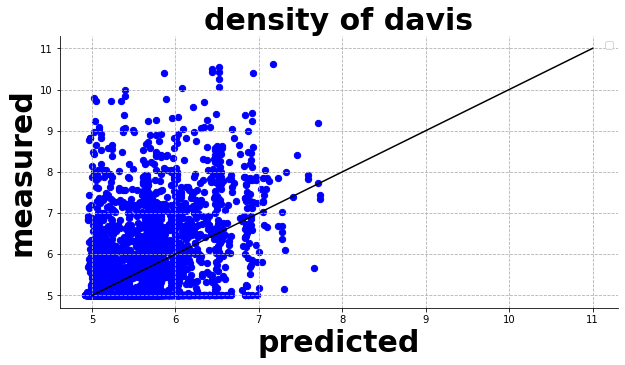

In [51]:
plot_density(Y, P, fold, dataset)

In [39]:
import torch
torch.cuda.empty_cache()

In [40]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='2, 3'